- artistName is the name of the artist
- trackName is the music name
- energy represents a perceptual measure of intensity and activity, measure from 0.0 to 1.0
- danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity, measure from 0.0 to 1.0
- key The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation 
- loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Measures from -60 to 0.
- mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- speechiness detects the presence of spoken words in a track, measure from 0.0 to 1.0
- acousticness whether the track is acoustic , measure from 0.0 to 1.0
- instrumentalness 	Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content
- liveness Detects the presence of an audience in the recording.Measure from 0.0 to 1.0
- variance racks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). Measure from 0.0 to 1.0
- tempo In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- duration_ms 	The duration of the track in milliseconds.
- time_signature The time signature (meter) is a notational convention to specify how many beats are in each bar
- The popularity of the artist. The value will be between 0 and 100, with 100 being the most popular. The artist’s popularity is calculated from the popularity of all the artist’s tracks.

# 0.0 Importanto Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from langdetect import detect
from string import digits

In [2]:
## 0.1 Importando Dados

In [6]:
Df_raw_my = pd.read_csv('My_Spotify_Data_Final.csv')
Df_raw_my = Df_raw_my.drop_duplicates()

In [4]:
data1 = pd.read_csv('Data1.csv')
data1 = data1.drop('Unnamed: 0',axis = 1)

data2 = pd.read_csv('Data2.csv')
data2 = data2.drop('Unnamed: 0',axis = 1)

data3 = pd.read_csv('Data3.csv')
data3 = data3.drop('index',axis = 1)

data4 = pd.read_csv('Data4.csv')
data5 = pd.read_csv('Data5.csv')
data6 = pd.read_csv('Data6.csv')
data7 = pd.read_csv('Data7.csv')
data8 = pd.read_csv('Data8.csv')
data9 = pd.read_csv('Data9.csv')
data10 = pd.read_csv('Data10.csv')

Data_Final = pd.concat([data1,data2,data3,data4,data5,data6,data7,data8,data9,data10]).reset_index()
Data_Final = Data_Final.drop('index',axis = 1)
Data_Final = Data_Final.drop_duplicates()

index_non = Data_Final[Data_Final['energy'] == 'Non'].index
Data_Final = Data_Final.drop(index_non)

D:\Users\gusta\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
D:\Users\gusta\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [205]:
Len_validation = int(round(len(Data_Final)*0.2,0))

Data_Validation = Data_Final.sample(Len_validation)
index_validation = Data_Validation.index

Data_Final = Data_Final.drop(index_validation)

# 1.0 Descrição dos dados

In [206]:
df1_my = Df_raw_my.copy()

In [207]:
df1_my.columns

Index(['artistName', 'trackName', 'energy', 'danceability', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'popularity'],
      dtype='object')

## 1.1 My Data

In [208]:
df1_my.sample(5)

,artistName,trackName,energy,danceability,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity
1011,Sia,Elastic Heart,0.791,0.421,0.421,-4.998,1.0,0.0496,0.0117,0.000015,0.1460,0.499,130.075,257200.0,4.0,65
14402,MC Kevinho,O Grave Bater,0.742,0.913,0.913,-2.350,0.0,0.0562,0.4610,0.000052,0.0553,0.805,95.017,181904.0,4.0,58
6423,Vibrações,Amor Entre Versos,0.531,0.701,0.701,-6.914,0.0,0.0364,0.0971,0.000000,0.4520,0.469,139.882,223507.0,4.0,43
13304,CPM 22,Vai Mudar? - Live,0.839,0.377,0.377,-6.670,1.0,0.0497,0.1450,0.000003,0.9060,0.750,177.427,151640.0,4.0,30
8158,Twenty One Pilots,House of Gold,0.693,0.680,0.680,-7.234,1.0,0.0435,0.4450,0.000000,0.2080,0.851,114.948,163880.0,4.0,70


### 1.1.1 Dimensão dos dados

In [209]:
df1_my.shape

(6024, 16)

### 1.1.2 Tipos dos Dados

In [210]:
df1_my.dtypes

artistName           object
trackName            object
energy              float64
danceability        float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms         float64
time_signature      float64
popularity            int64
dtype: object

### 1.1.3 Missing Value

In [211]:
df1_my.isna().sum()

artistName          0
trackName           0
energy              0
danceability        0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
popularity          0
dtype: int64

### 1.1.4 Descriptive Statistical

In [212]:
 numerical_columns = df1_my.select_dtypes(include = ['int64','float'])

In [213]:
mean = pd.DataFrame(numerical_columns.apply(np.mean)).T
median = pd.DataFrame(numerical_columns.apply(np.median)).T
std = pd.DataFrame(numerical_columns.apply(np.std)).T

mini = pd.DataFrame(numerical_columns.apply(lambda x:x.min())).T
maxi = pd.DataFrame(numerical_columns.apply(lambda x:x.max())).T
amp = pd.DataFrame(numerical_columns.apply(lambda x:x.max() - x.min())).T

skew = pd.DataFrame(numerical_columns.apply(lambda x:x.skew())).T
kurt = pd.DataFrame(numerical_columns.apply(lambda x:x.kurtosis())).T

In [214]:
Desc = pd.concat([mean,median,std,mini,maxi,amp,skew,kurt]).T.reset_index()

Desc.columns = ['Atribute','mean','median','std','min','max','amplitude','skew','kurtosis']

Desc

,Atribute,mean,median,std,min,max,amplitude,skew,kurtosis
0,energy,0.720058,0.758000,0.199463,0.006050,0.999,0.992950,-0.837653,0.191915
1,danceability,0.597897,0.606000,0.157559,0.095600,0.974,0.878400,-0.217183,-0.350061
2,key,0.597897,0.606000,0.157559,0.095600,0.974,0.878400,-0.217183,-0.350061
3,loudness,-6.186887,-5.580500,3.058780,-38.427000,1.509,39.936000,-1.983859,8.679198
4,mode,0.620850,1.000000,0.485176,0.000000,1.000,1.000000,-0.498294,-1.752285
5,speechiness,0.085265,0.053800,0.082051,0.023100,0.814,0.790900,2.779890,9.759764
6,acousticness,0.223089,0.107000,0.260002,0.000003,0.996,0.995997,1.156703,0.241312
7,instrumentalness,0.033874,0.000002,0.143606,0.000000,0.972,0.972000,4.958767,24.523511
8,liveness,0.255747,0.151000,0.236917,0.019700,0.995,0.975300,1.672288,1.916185
9,valence,0.535882,0.543000,0.231180,0.033400,0.988,0.954600,-0.078995,-0.872569


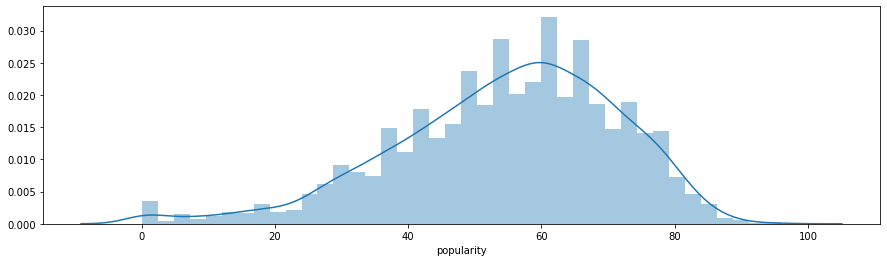

In [215]:
plt.figure(figsize = (15,4))
sns.distplot(df1_my['popularity'])

## 1.2 All Data

In [216]:
df1_all = Data_Final.copy()

### 1.2.1 Dimensão dos dados

In [217]:
df1_all.shape

(782379, 16)

### 1.2.2 Columns Types

In [218]:
df1_all.dtypes

Music_name          object
Artist              object
energy              object
danceability        object
key                 object
loudness            object
mode                object
speechiness         object
acousticness        object
instrumentalness    object
liveness            object
valence             object
tempo               object
duration_ms         object
time_signature      object
popularity           int64
dtype: object

In [219]:
df1_all['energy'] = df1_all['energy'].astype('float')
df1_all['time_signature'] = df1_all['time_signature'].astype('float')
df1_all['duration_ms'] = df1_all['duration_ms'].astype('float')
df1_all['tempo'] = df1_all['tempo'].astype('float')
df1_all['valence'] = df1_all['valence'].astype('float')
df1_all['liveness'] = df1_all['liveness'].astype('float')
df1_all['instrumentalness'] = df1_all['instrumentalness'].astype('float')
df1_all['acousticness'] = df1_all['acousticness'].astype('float')
df1_all['speechiness'] = df1_all['speechiness'].astype('float')
df1_all['mode'] = df1_all['mode'].astype('float')
df1_all['loudness'] = df1_all['loudness'].astype('float')
df1_all['key'] = df1_all['key'].astype('float')
df1_all['danceability'] = df1_all['danceability'].astype('float')

### 1.2.3 Missing Value

In [220]:
df1_all.isna().sum()

Music_name          2
Artist              5
energy              0
danceability        0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
popularity          0
dtype: int64

In [221]:
index_missing_art = df1_all[df1_all['Artist'].isna() == True].index
index_missing_music = df1_all[df1_all['Music_name'].isna() == True].index
index_missing = np.concatenate([index_missing_art,index_missing_music])
df1_all = df1_all.drop(index_missing)

### 1.2.4 Missing Value

In [222]:
 numerical_columns_all = df1_all.select_dtypes(include = ['int64','float'])

In [223]:
mean_all = pd.DataFrame(numerical_columns_all.apply(np.mean)).T
median_all = pd.DataFrame(numerical_columns_all.apply(np.median)).T
std_all = pd.DataFrame(numerical_columns_all.apply(np.std)).T

mini_all = pd.DataFrame(numerical_columns_all.apply(lambda x:x.min())).T
maxi_all = pd.DataFrame(numerical_columns_all.apply(lambda x:x.max())).T
amp_all = pd.DataFrame(numerical_columns_all.apply(lambda x:x.max() - x.min())).T

skew_all = pd.DataFrame(numerical_columns_all.apply(lambda x:x.skew())).T
kurt_all = pd.DataFrame(numerical_columns_all.apply(lambda x:x.kurtosis())).T

In [224]:
Desc_all = pd.concat([mean_all,median_all,std_all,mini_all,maxi_all,amp_all,skew_all,kurt_all]).T.reset_index()

Desc_all.columns = ['Atribute','mean','median','std','min','max','amplitude','skew','kurtosis']

Desc_all

,Atribute,mean,median,std,min,max,amplitude,skew,kurtosis
0,energy,0.570723,0.598000,0.256879,0.0,1.000,1.000,-0.391773,-0.718047
1,danceability,0.599345,0.628000,0.188757,0.0,0.994,0.994,-0.606073,-0.096762
2,key,0.599345,0.628000,0.188757,0.0,0.994,0.994,-0.606073,-0.096762
3,loudness,-10.179206,-8.454000,6.189737,-60.0,5.343,65.343,-1.646922,3.579960
4,mode,0.604781,1.000000,0.488898,0.0,1.000,1.000,-0.428644,-1.816269
5,speechiness,0.143536,0.062600,0.181467,0.0,0.972,0.972,2.678365,7.965872
6,acousticness,0.343479,0.218000,0.337779,0.0,0.996,0.996,0.666141,-1.006554
7,instrumentalness,0.215714,0.000061,0.356399,0.0,1.000,1.000,1.222711,-0.335188
8,liveness,0.199805,0.126000,0.174795,0.0,1.000,1.000,2.246192,5.346722
9,valence,0.470479,0.464000,0.259829,0.0,1.000,1.000,0.096669,-0.998274


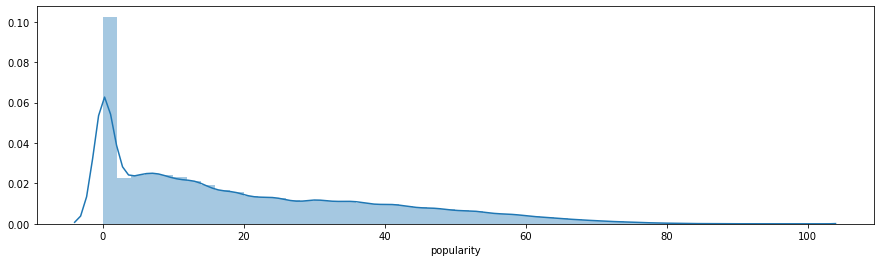

In [225]:
plt.figure(figsize = (15,4))
sns.distplot(df1_all['popularity'])

# 2.0 Feature Engineering

## 2.1 Lista de Hipoteses Relacionado com minhas Playlist

**1 Minhas musicas preferidas são menos dancantes**

**2 Minhas musicas preferidas são mais triste**

**3 Minhas musicas preferidas são mais energia**

## 2.2 Lista de Hipoteses dos Dados Gerais

**1. Musicas com maior dancatibilidade são mais populares**

**2. Musicas instrumentais são menos populares**

**3. Musicas acusticas são menos dancaveis**

**4. Musicas ao vivo as pessoas estão mais felizes (variance)**

**5. Musicas dancaveis são mais alegres**

**6 Musicas tristes são mais populares**

# 3.0 Exploratory Data Analysis

In [226]:
df3_my = df1_my.copy().reset_index()
df3_all = df1_all.copy()

In [227]:
df3_my

,index,artistName,trackName,energy,danceability,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity
0,0,Metallica,St. Anger,0.949,0.249,0.249,-2.642,0.0,0.0678,0.001310,0.022800,0.0953,0.498,185.252,441133.0,4.0,52
1,2,Seether,Careless Whisper,0.943,0.469,0.469,-4.196,1.0,0.1020,0.000061,0.005470,0.0717,0.358,134.031,296973.0,4.0,64
2,3,Ed Sheeran,I Don't Care (with Justin Bieber),0.675,0.798,0.798,-5.041,1.0,0.0442,0.091200,0.000000,0.0894,0.842,101.956,219947.0,4.0,83
3,5,Supercombo,Monstros,0.762,0.506,0.506,-7.662,0.0,0.0387,0.027800,0.000000,0.3410,0.402,132.000,245507.0,4.0,46
4,6,Diego & Victor Hugo,Do Copo Eu Vim (feat. Marília Mendonça) - Ao V...,0.884,0.668,0.668,-3.239,1.0,0.0651,0.663000,0.000000,0.4500,0.707,116.993,144071.0,4.0,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019,19369,grandson,Blood / / Water,0.891,0.504,0.504,-5.632,0.0,0.1370,0.001630,0.001990,0.1480,0.628,153.988,214520.0,4.0,71
6020,19370,Twenty One Pilots,Nico And The Niners,0.602,0.728,0.728,-7.748,0.0,0.1850,0.069900,0.000007,0.3180,0.328,140.081,225040.0,4.0,69
6021,19382,Marília Mendonça,Estranho,0.504,0.739,0.739,-5.925,1.0,0.0576,0.493000,0.000000,0.0956,0.391,155.876,157931.0,4.0,59
6022,19390,Móveis Coloniais de Acaju,Não Chora,0.436,0.508,0.508,-9.300,1.0,0.0326,0.858000,0.000011,0.1110,0.286,159.741,293360.0,4.0,31


## 3.1 Analise Univariada

### 3.1.1 My Data

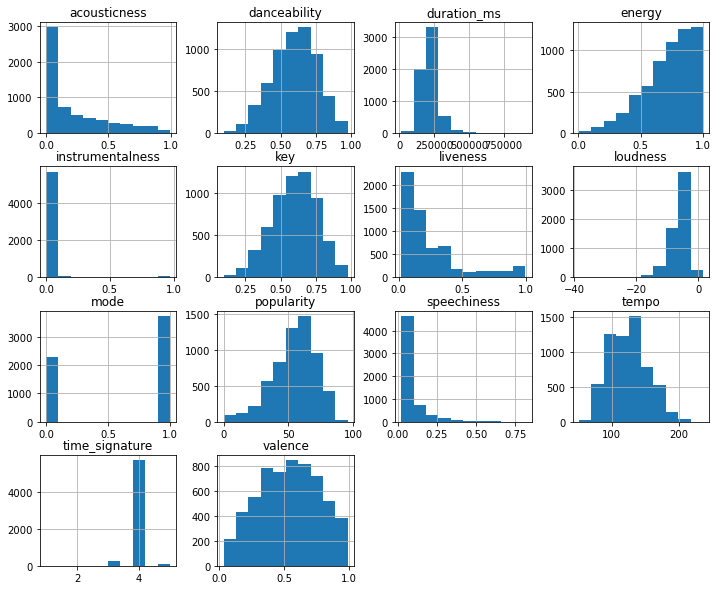

In [228]:
numerical_columns.hist(figsize = (12,10));

### 3.1.2 All Data

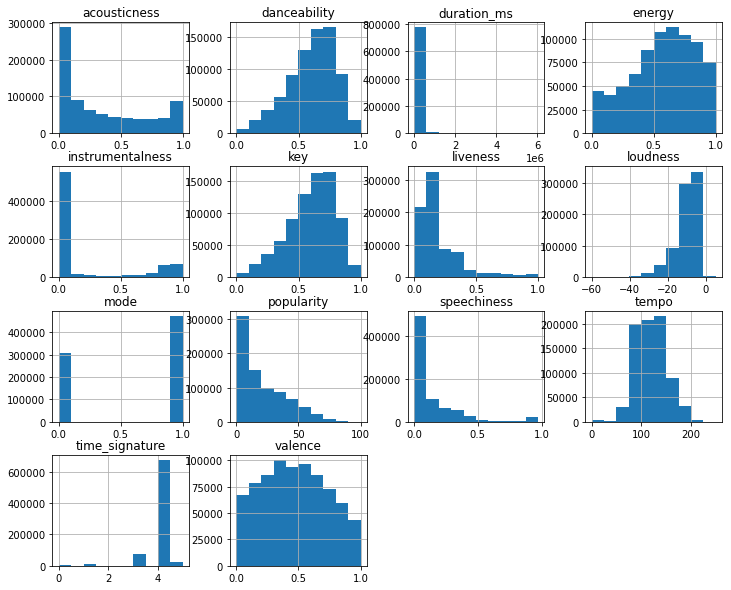

In [229]:
numerical_columns_all.hist(figsize = (12,10));

## 3.2 Analise Bivariada

### 3.2.1 My Data

#### 3.2.1.1 The artists I listen to most are related to rock and punk

**True** Only have two artists that is not genre rock (Marilia Mendonça and Criolo).

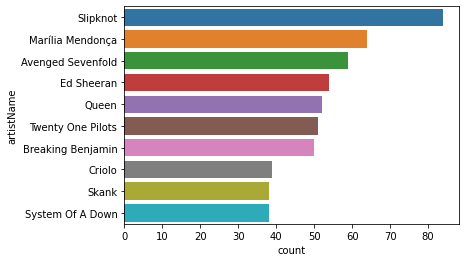

In [230]:
By_artist = df3_my[['artistName','popularity']].groupby('artistName').count().reset_index()
By_artist = By_artist.rename(columns = {'popularity':'count'})
Ten_artist = By_artist.sort_values('count',ascending = False).reset_index().iloc[0:10]
sns.barplot(x='count', y='artistName', data=Ten_artist);

#### 3.2.1.2 I listen more music from Brazil than internacional

**False** 

In [231]:
country = []
for i in range(0,len(df3_my['trackName'].values)):
    print(i)
    if df3_my['trackName'].values[i].replace('-','').replace('%','').replace(':','').replace('(','').replace(')','').isdecimal():
        country.append('en')
    else:
        country.append(detect(df3_my['trackName'].values[i]))
df3_my['country'] = country
df3_my['country_pt'] = df3_my['country'].apply(lambda x: 1 if x == 'pt' else 0)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061


3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715


5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359


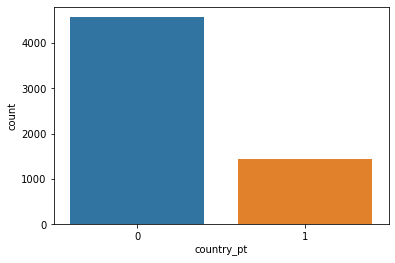

In [232]:
By_country = df3_my[['country_pt','energy']].groupby('country_pt').count().reset_index()
By_country = By_country.rename(columns = {'energy':'count'})
#Ten_country = By_country.sort_values('count',ascending = False).reset_index()
sns.barplot(x='country_pt', y='count', data=By_country);

#### 3.2.1.3The artists I listen to most are  very popular

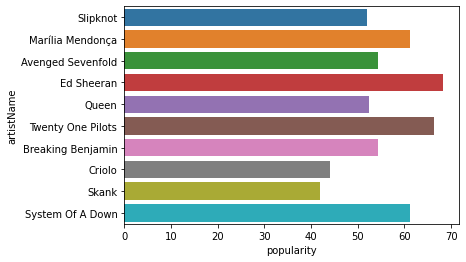

In [233]:
Pop = df3_my[['artistName','energy','popularity']].groupby('artistName')\
.agg({'energy':'count', 'popularity':'mean'})\
.rename(columns={'energy':'count'}) \
.reset_index()

Pop = Pop.sort_values('count',ascending = False)[0:10]
sns.barplot(x='popularity', y='artistName', data=Pop);

### 3.2.2 All Data

1. Musicas com maior dancatibilidade são mais populares

2. Musicas instrumentais são menos populares

3. Musicas acusticas são menos dancaveis

4. Musicas ao vivo são mais barulhento

5. Musicas dancaveis são mais alegres

6. Live music has more energy

In [234]:
#### 3.2.2.1 Musics with higher dancebility are more popular

In [235]:
df3_all

,Music_name,Artist,energy,danceability,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity
0,All Girls Are The Same,Juice WRLD,0.529,0.671,0.671,-7.226,1.0,0.3070,0.07690,0.000335,0.0856,0.203,161.989,165820.0,4.0,86
1,After Party,Don Toliver,0.692,0.629,0.629,-8.045,1.0,0.0376,0.00981,0.331000,0.6030,0.453,162.948,167916.0,4.0,86
2,Are You Bored Yet? (feat. Clairo),Wallows,0.683,0.682,0.682,-6.444,0.0,0.0287,0.15600,0.000023,0.2730,0.640,120.023,178000.0,4.0,85
3,Adore You,Harry Styles,0.771,0.676,0.676,-3.675,1.0,0.0483,0.02370,0.000007,0.1020,0.569,99.048,207133.0,4.0,87
5,"...And To Those I Love, Thanks For Sticking Ar...",$uicideBoy$,0.512,0.792,0.792,-6.875,1.0,0.0408,0.13000,0.000088,0.1400,0.110,113.978,168490.0,4.0,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1371505,Young One,D1zzy,0.416,0.653,0.653,-13.754,1.0,0.0601,0.46900,0.087800,0.1020,0.163,156.026,152033.0,4.0,1
1371506,Bottom Line Woman,Z.Z. Hill,0.839,0.618,0.618,-4.492,1.0,0.1550,0.10300,0.000516,0.2790,0.880,175.826,178867.0,4.0,1
1371507,Snap Your Fingers,Z.Z. Hill,0.446,0.586,0.586,-13.808,1.0,0.0392,0.46500,0.005440,0.0951,0.813,163.333,191000.0,4.0,3
1371508,Bump and Grind,Z.Z. Hill,0.658,0.414,0.414,-5.706,1.0,0.0402,0.51900,0.000046,0.0769,0.620,71.254,207840.0,4.0,3


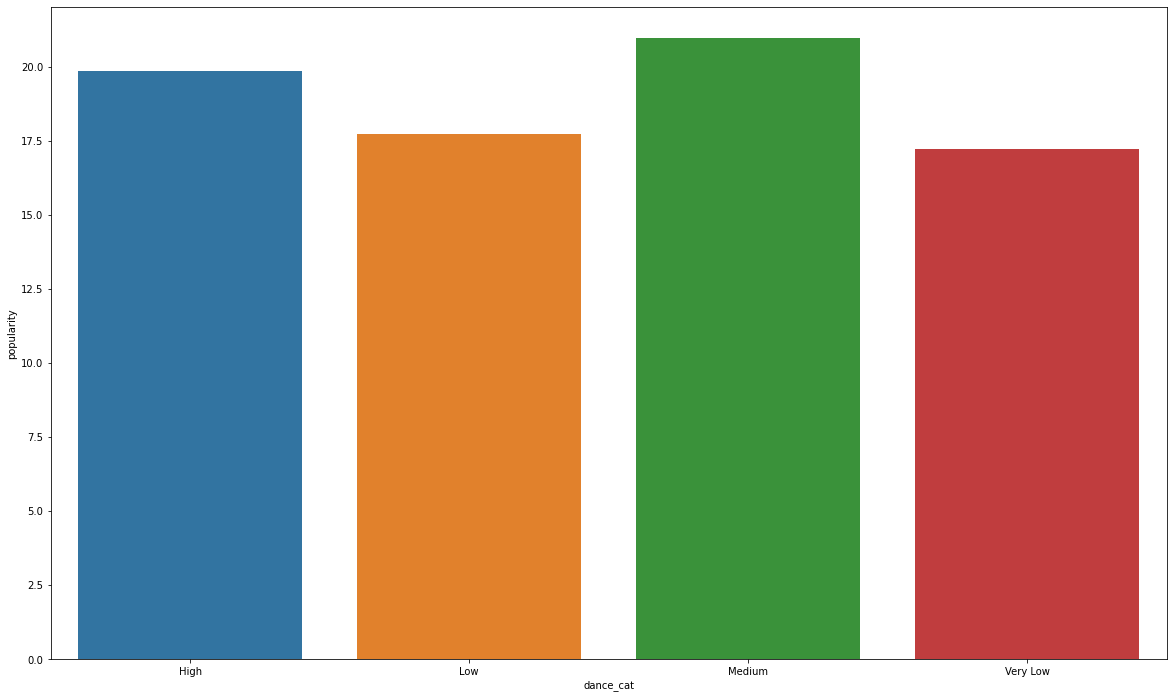

In [236]:
aux1 = df3_all.copy()
aux1['dance_cat'] = df3_all['danceability'].apply(lambda x: 'Very Low' if x <= 0.20 
                                                     else ('Low' if x <= 0.4 else ('Medium' if x <= 0.6 else 'High') ) )

aux2 = aux1[['dance_cat','popularity']].groupby('dance_cat').mean().reset_index()

plt.figure(figsize=(20,12))

sns.barplot(x = 'dance_cat',y = 'popularity', data = aux2);

In [237]:
#### 3.2.2.2 Instrumental music are less popular

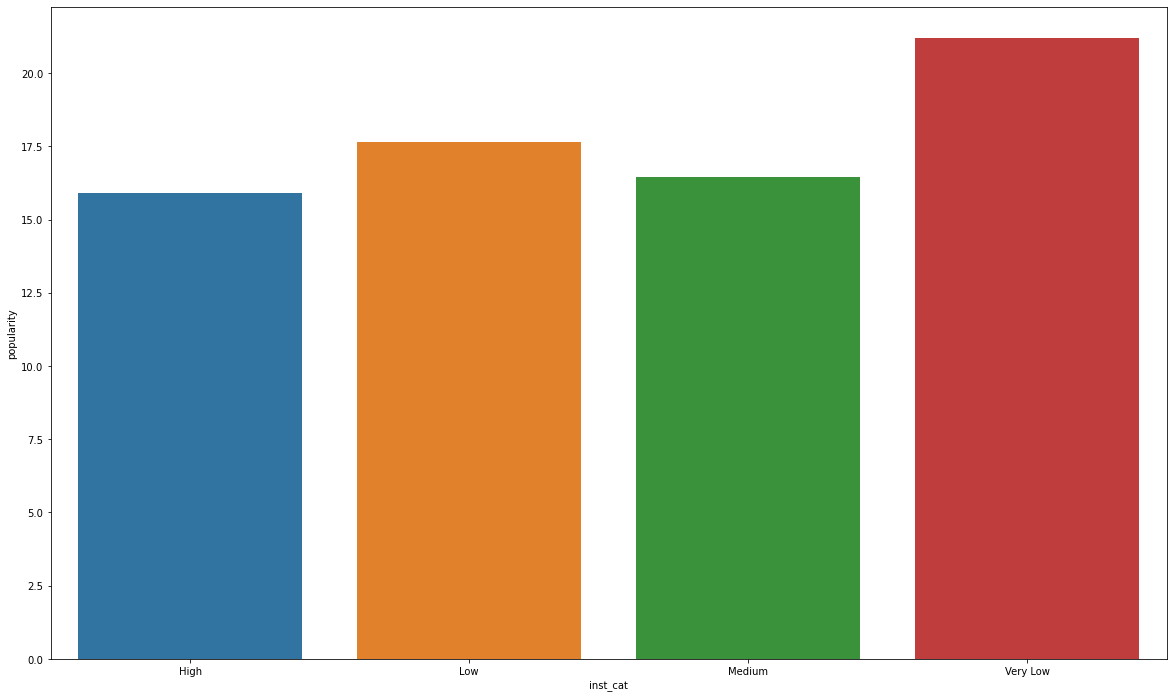

In [238]:
aux1 = df3_all.copy()
aux1['inst_cat'] = df3_all['instrumentalness'].apply(lambda x: 'Very Low' if x <= 0.20 
                                                     else ('Low' if x <= 0.4 else ('Medium' if x <= 0.6 else 'High') ) )

aux2 = aux1[['inst_cat','popularity']].groupby('inst_cat').mean().reset_index()

plt.figure(figsize=(20,12))

sns.barplot(x = 'inst_cat',y = 'popularity', data = aux2);

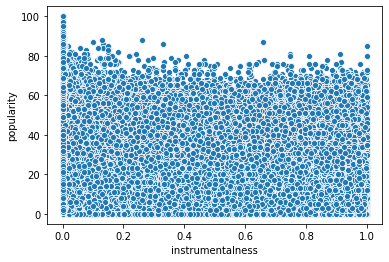

In [239]:
sns.scatterplot(df3_all['instrumentalness'],df3_all['popularity']);

In [240]:
#### 3.2.2.3 Acustic music are less dancing

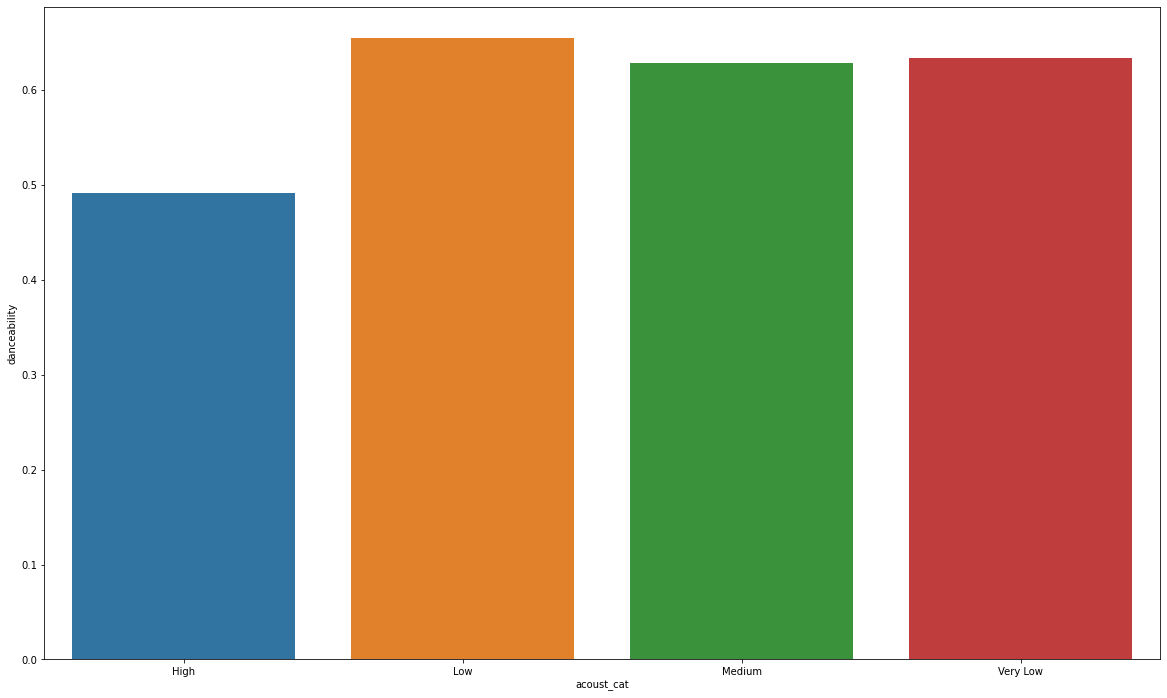

In [241]:
aux1 = df3_all.copy()
aux1['acoust_cat'] = df3_all['acousticness'].apply(lambda x: 'Very Low' if x <= 0.20 
                                                     else ('Low' if x <= 0.4 else ('Medium' if x <= 0.6 else 'High') ) )

aux2 = aux1[['acoust_cat','danceability']].groupby('acoust_cat').mean().reset_index()

plt.figure(figsize=(20,12))

sns.barplot(x = 'acoust_cat',y = 'danceability', data = aux2);

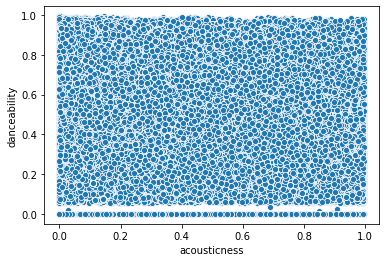

In [242]:
sns.scatterplot(df3_all['acousticness'],df3_all['danceability']);

In [243]:
#### 3.2.2.4 Danceble music are more happy

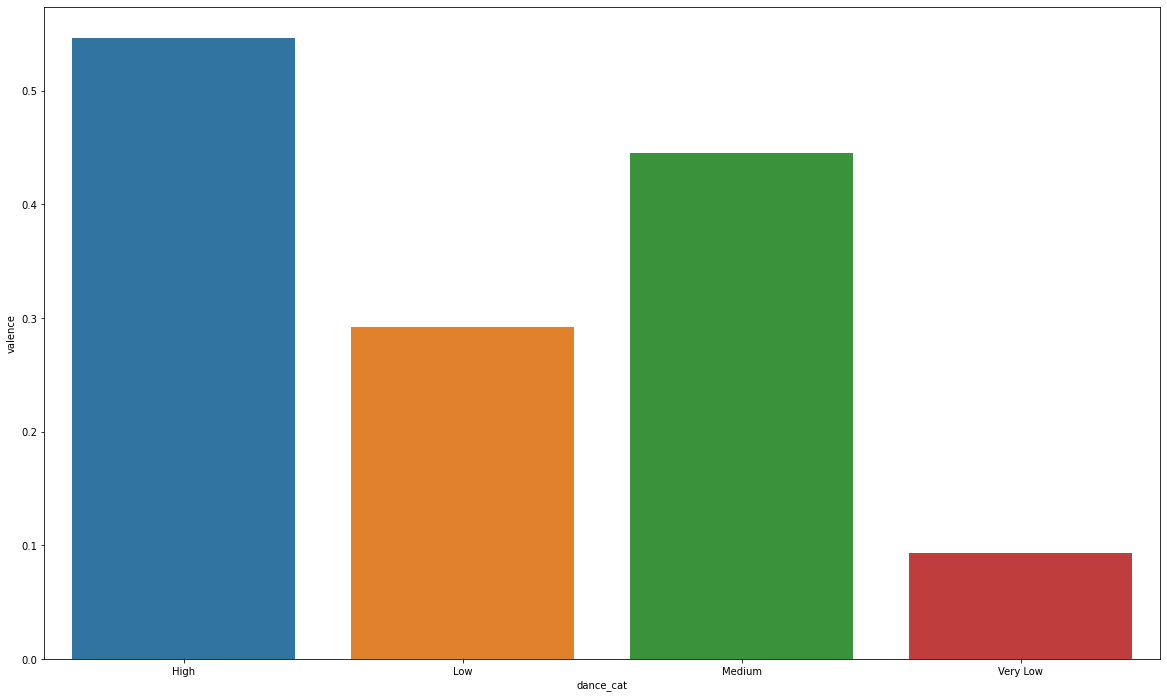

In [244]:
aux1 = df3_all.copy()
aux1['dance_cat'] = df3_all['danceability'].apply(lambda x: 'Very Low' if x <= 0.20 
                                                     else ('Low' if x <= 0.4 else ('Medium' if x <= 0.6 else 'High') ) )

aux2 = aux1[['dance_cat','valence']].groupby('dance_cat').mean().reset_index()

plt.figure(figsize=(20,12))

sns.barplot(x = 'dance_cat',y = 'valence', data = aux2);

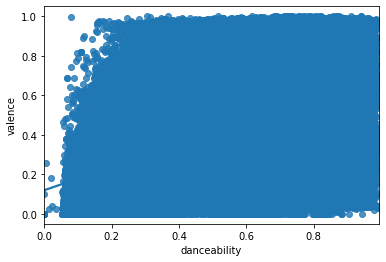

In [245]:
sns.regplot(df3_all['danceability'],df3_all['valence']);

In [246]:
#### 3.2.2.5 Live music are more loudness

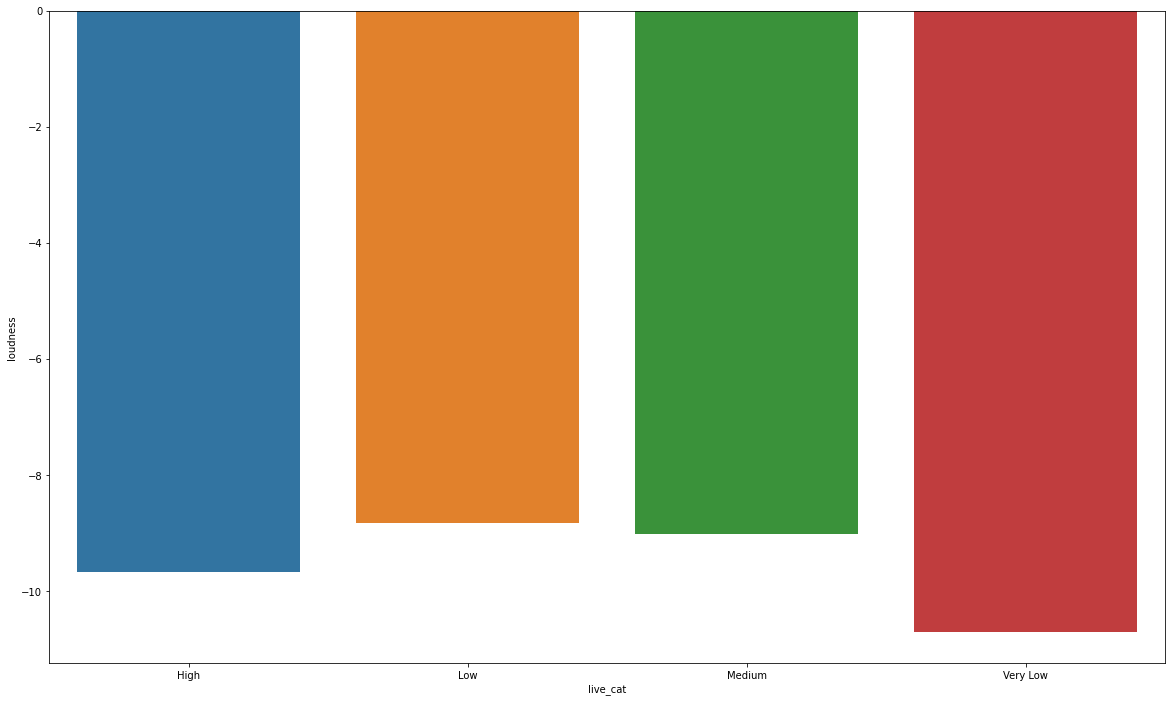

In [247]:
aux1 = df3_all.copy()
aux1['live_cat'] = df3_all['liveness'].apply(lambda x: 'Very Low' if x <= 0.20 
                                                     else ('Low' if x <= 0.4 else ('Medium' if x <= 0.6 else 'High') ) )

aux2 = aux1[['live_cat','loudness']].groupby('live_cat').mean().reset_index()

plt.figure(figsize=(20,12))

sns.barplot(x = 'live_cat',y = 'loudness', data = aux2);

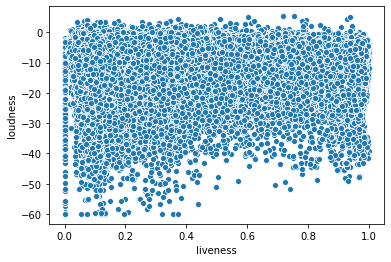

In [248]:
sns.scatterplot(df3_all['liveness'],df3_all['loudness']);

In [249]:
#### 3.2.2.6 Live music has more energy

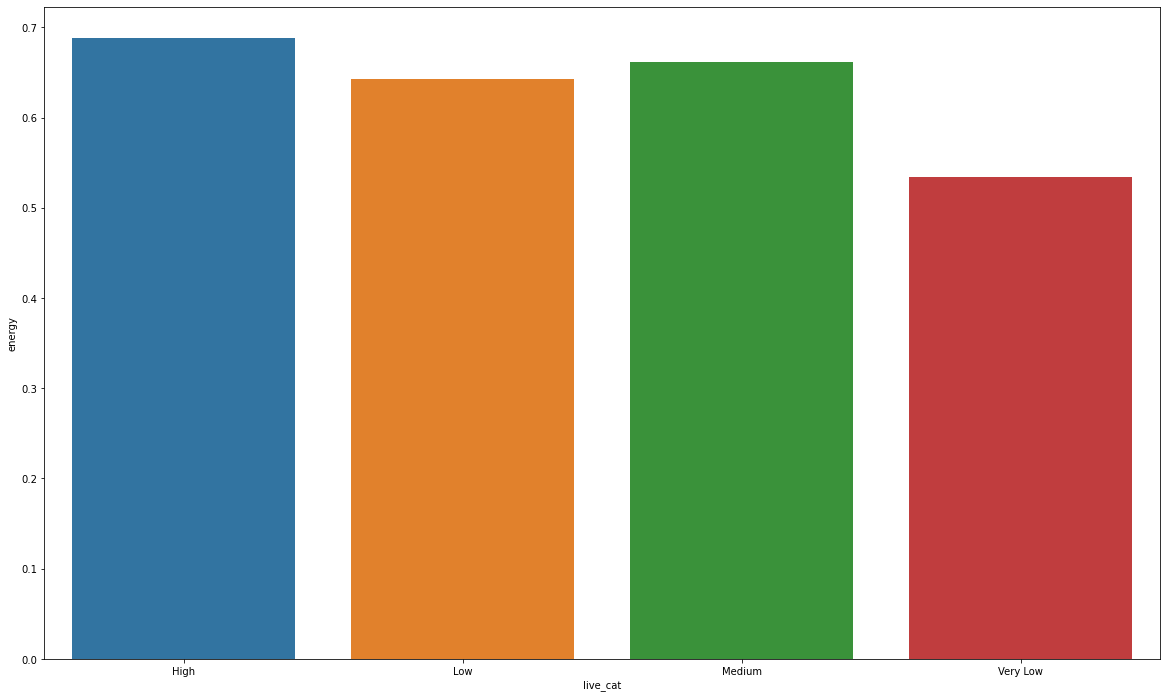

In [250]:
aux1 = df3_all.copy()
aux1['live_cat'] = df3_all['liveness'].apply(lambda x: 'Very Low' if x <= 0.20 
                                                     else ('Low' if x <= 0.4 else ('Medium' if x <= 0.6 else 'High') ) )

aux2 = aux1[['live_cat','energy']].groupby('live_cat').mean().reset_index()

plt.figure(figsize=(20,12))

sns.barplot(x = 'live_cat',y = 'energy', data = aux2);

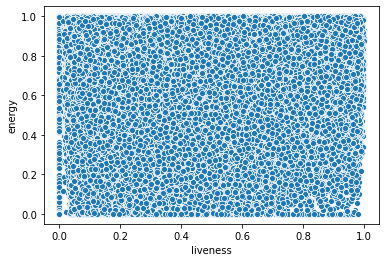

In [251]:
sns.scatterplot(df3_all['liveness'],df3_all['energy']);

## 3.3 Multivariate Analysis


### 3.3.1 Radar chart

In [253]:
from math import pi
mean_no_durantion = mean.drop(['duration_ms','tempo','loudness','time_signature','popularity','mode'], axis = 1)
mean_no_durantion_all = mean_all.drop(['duration_ms','tempo','loudness','time_signature','popularity','mode'], axis = 1)

Attributes =list(mean_no_durantion)
AttNo = len(Attributes)

values = list(mean_no_durantion.iloc[0])
values += values[:1]

angles = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles += angles [:1]

Attributes2 =list(mean_no_durantion_all)
AttNo2 = len(Attributes2)

values2 = list(mean_no_durantion_all.iloc[0])
values2 += values2[:1]

angles2 = [n / float(AttNo2) * 2 * pi for n in range(AttNo2)]
angles2 += angles2 [:1]

<ipython-input-254-dba8f4ca01dc>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111, polar=True)


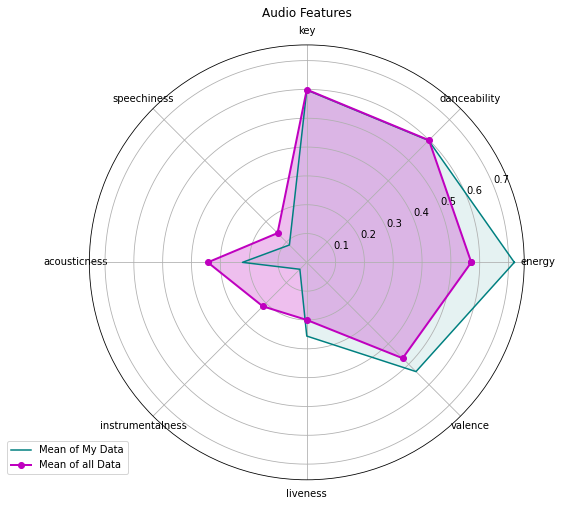

In [254]:
fig=plt.figure(figsize = (12,8))
ax = fig.add_subplot(111, polar=True)
ax = fig.add_subplot(111, polar=True)
#Add the attribute labels to our axes
plt.xticks(angles[:-1],Attributes)

#Plot the line around the outside of the filled area, using the angles and values calculated before
ax.plot(angles,values, color = 'teal', label = 'Mean of My Data')

#Fill in the area plotted in the last line
ax.fill(angles, values, 'teal', alpha=0.1)

ax.plot(angles2, values2, 'o-', linewidth=2, label = "Mean of all Data", color = 'm')
ax.fill(angles2, values2, alpha=0.25, facecolor='m' )
ax.set_title('Mean Values of the audio features')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

#Give the plot a title and show it
ax.set_title("Audio Features");
plt.show();



### 3.3.2 Correlation

#### 3.3.2.1 My Data

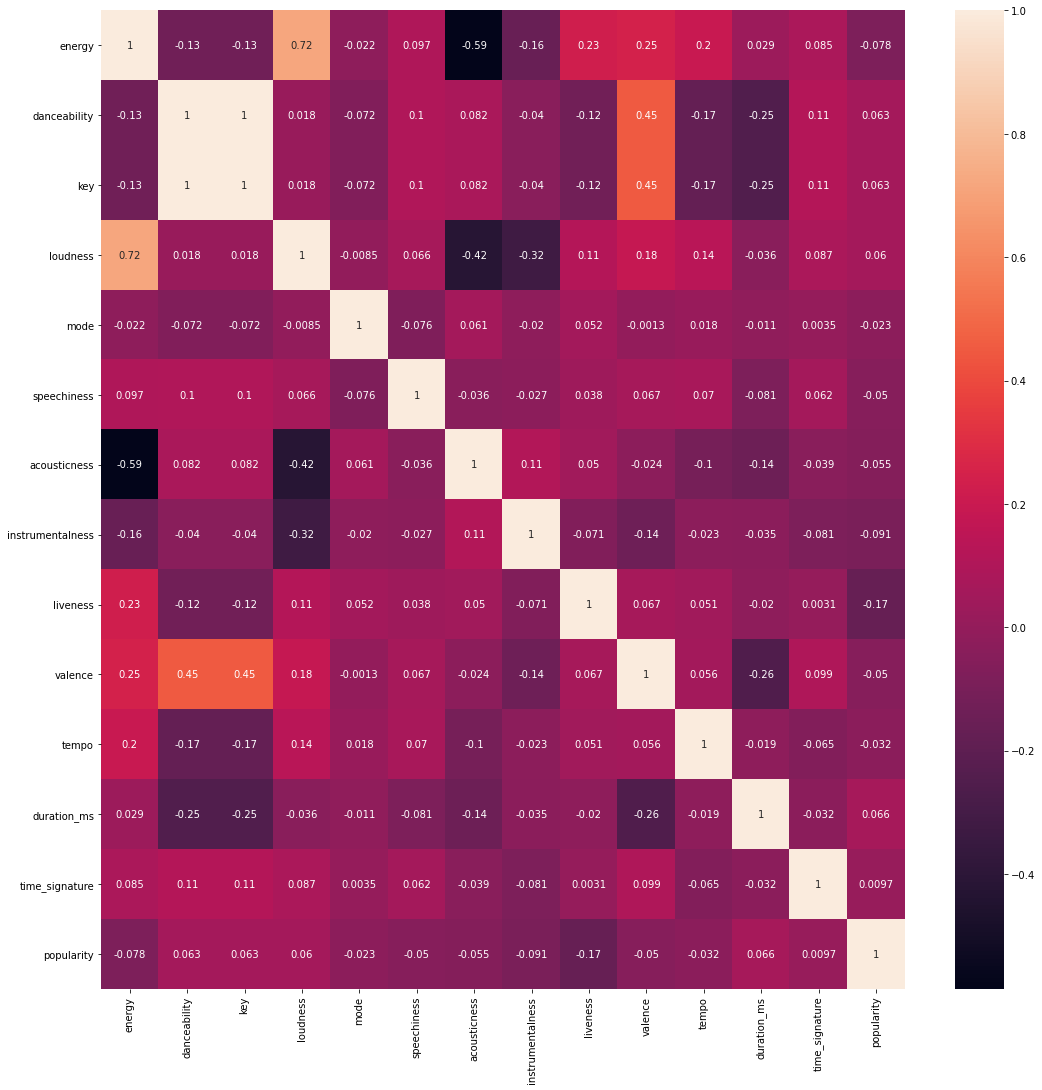

In [255]:
correlation = numerical_columns.corr(method = 'pearson')

plt.figure(figsize = (18,18))
sns.heatmap(correlation, annot = True);

#### 3.3.2.1 All Data

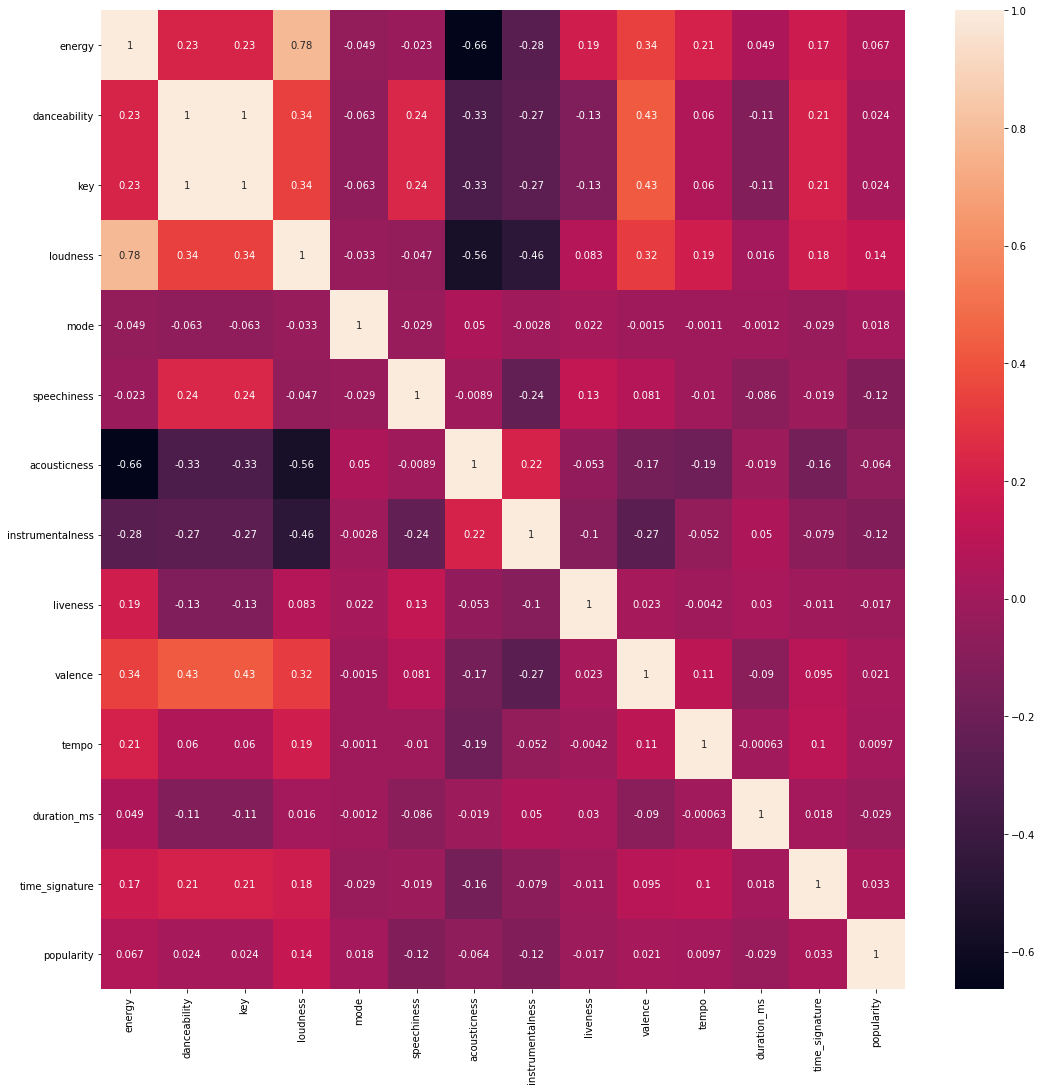

In [256]:
correlation_all = numerical_columns_all.corr(method = 'pearson')

plt.figure(figsize = (18,18))
sns.heatmap(correlation_all, annot = True);

# 4.0 Data Preparation

In [385]:
df4_my = df3_my.copy()
df4_all = df3_all.copy()

df4_my.drop('index',inplace = True,axis = 1)
df4_my = df4_my.rename(columns = {'artistName':'Artist','trackName':'Music_name'})


In [358]:
#df4_test = df4_all.sample(len(df4_my)).reset_index()

In [359]:
#df4_test

,index,Music_name,Artist,energy,danceability,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity
0,1199264,Pandu Thotte,Nomadic Voice,0.655000,0.814,0.814,-8.428,0.0,0.0867,0.3470,0.000000,0.1160,0.351,99.981,168000.0,4.0,27
1,467041,"St. Marc Passion, BWV 247 - Reconstruction: Di...",Johann Sebastian Bach,0.077100,0.203,0.203,-22.406,0.0,0.0573,0.9810,0.000000,0.3880,0.245,190.396,45000.0,3.0,9
2,317010,Varser,Mike Ahayan,0.000609,0.545,0.545,-33.779,1.0,0.1220,0.9940,0.979000,0.0902,0.000,134.646,42971.0,3.0,17
3,177895,Playaz Club,Rappin' 4-Tay,0.372000,0.868,0.868,-12.704,0.0,0.1770,0.0103,0.004550,0.0760,0.666,99.965,266333.0,4.0,52
4,1145865,In 't Groene Woud,De Migras,0.733000,0.490,0.490,-11.080,1.0,0.0674,0.6140,0.000724,0.2670,0.805,118.599,191973.0,4.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019,515223,I Must Tell Jesus,Hymns on Piano,0.035800,0.508,0.508,-27.383,1.0,0.0552,0.9940,0.952000,0.1050,0.226,77.946,219502.0,4.0,38
6020,811334,Falling,*NSYNC,0.591000,0.697,0.697,-9.509,1.0,0.0294,0.2070,0.000000,0.2120,0.241,131.833,227413.0,4.0,37
6021,1261715,Pearl,Xkylaar,0.618000,0.535,0.535,-7.531,0.0,0.0406,0.8480,0.825000,0.3250,0.276,202.001,211528.0,4.0,0
6022,977535,Estoy Bien,Rubinsky Rbk,0.762000,0.807,0.807,-6.258,0.0,0.1440,0.3230,0.000000,0.0935,0.756,144.098,256000.0,4.0,12


In [388]:
df4_my['Like'] = 'Yes'

In [389]:
#df4_test['Like'] = 'No'
df4_all['Like'] = 'No'

In [276]:
#Len_Like_random = int(round(len(Data_Final)*0.5,0))

#Data_Like_random = df4_all.sample(Len_Like_random)
#index_Like_random = Data_Like_random.index

#df4_all.loc[index_Like_random,'Like'] = 'Yes'
#Data_Final = Data_Final.drop(index_validation)

In [277]:
#index_all = df4_all[(df4_all['key'] > 0.6) & (df4_all['energy'] > 0.7) & (df4_all['danceability'] > 0.6) & (df4_all['valence'] > 0.5) & (df4_all['acousticness'] < 0.2)]['Like'].index

#df4_all.loc[index_all,'Like'] = 'Yes'

In [390]:
#df4 = pd.concat([df4_my,df4_test])
df4 = pd.concat([df4_my,df4_all])
df4 = df4.drop_duplicates()
df4.drop('Music_name',axis = 1,inplace = True)

In [331]:
## 4.1 Rescaling

In [391]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler


rs = RobustScaler()
mms = MinMaxScaler()

df4[['loudness']] = rs.fit_transform(df4[['loudness']].values)
df4[['duration_ms']] = rs.fit_transform(df4[['duration_ms']].values)

df4[['tempo']] = rs.fit_transform(df4[['tempo']].values)
df4[['popularity']] = mms.fit_transform(df4[['popularity']].values)

## 4.2 Categorical Transformation Variables

In [392]:
fe = df4.groupby('Artist').size()/len(df4)
df4.loc[:,'Artist_encode'] = df4['Artist'].map(fe)


In [393]:
df4.columns

Index(['Artist', 'energy', 'danceability', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'popularity',
       'country', 'country_pt', 'Like', 'Artist_encode'],
      dtype='object')

In [394]:
#drops = ['Artist','country','country_pt','index']
drops = ['Artist','country','country_pt']
df4 = df4.drop(drops,axis=1)

In [395]:
df4

,energy,danceability,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity,Like,Artist_encode
0,0.949,0.249,0.249,0.893319,0.0,0.0678,0.001310,0.022800,0.0953,0.498,1.471457,2.526366,4.0,0.52,Yes,0.000253
1,0.943,0.469,0.469,0.654095,1.0,0.1020,0.000061,0.005470,0.0717,0.358,0.316192,0.983443,4.0,0.64,Yes,0.000063
2,0.675,0.798,0.798,0.524015,1.0,0.0442,0.091200,0.000000,0.0894,0.842,-0.407245,0.159044,4.0,0.83,Yes,0.000240
3,0.762,0.506,0.506,0.120536,0.0,0.0387,0.027800,0.000000,0.3410,0.402,0.270384,0.432609,4.0,0.46,Yes,0.000047
4,0.884,0.668,0.668,0.801416,1.0,0.0651,0.663000,0.000000,0.4500,0.707,-0.068092,-0.653045,4.0,0.59,Yes,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1371505,0.416,0.653,0.653,-0.817272,1.0,0.0601,0.469000,0.087800,0.1020,0.163,0.812279,-0.567829,4.0,0.01,No,0.000005
1371506,0.839,0.618,0.618,0.608528,1.0,0.1550,0.103000,0.000516,0.2790,0.880,1.258858,-0.280629,4.0,0.01,No,0.000123
1371507,0.446,0.586,0.586,-0.825585,1.0,0.0392,0.465000,0.005440,0.0951,0.813,0.977085,-0.150771,4.0,0.03,No,0.000123
1371508,0.658,0.414,0.414,0.421644,1.0,0.0402,0.519000,0.000046,0.0769,0.620,-1.099714,0.029465,4.0,0.03,No,0.000123


In [396]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df4['Like'] = le.fit_transform(df4['Like'])

## 5.3 Imbalanced Data

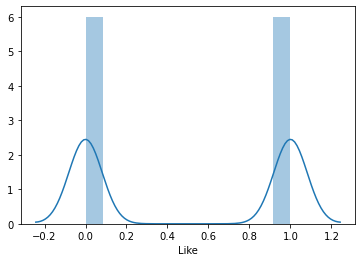

In [370]:
sns.distplot(df4['Like']);

# 5.0 Seleção de variaveis

In [397]:
df5 = df4.copy()

In [372]:
df5

,energy,danceability,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity,Like,Artist_encode
0,0.9490,0.249,0.249,0.823229,0.0,0.0678,0.001310,0.022800,0.0953,0.498,1.527033,3.075920,4.0,0.541667,1,0.001494
1,0.9430,0.469,0.469,0.511509,1.0,0.1020,0.000061,0.005470,0.0717,0.358,0.270831,1.170352,4.0,0.666667,1,0.000249
2,0.6750,0.798,0.798,0.342009,1.0,0.0442,0.091200,0.000000,0.0894,0.842,-0.515813,0.152190,4.0,0.864583,1,0.004565
3,0.7620,0.506,0.506,-0.183742,0.0,0.0387,0.027800,0.000000,0.3410,0.402,0.221020,0.490053,4.0,0.479167,1,0.002988
4,0.8840,0.668,0.668,0.703475,1.0,0.0651,0.663000,0.000000,0.4500,0.707,-0.147028,-0.850771,4.0,0.614583,1,0.000664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019,0.0358,0.508,0.508,-4.139612,1.0,0.0552,0.994000,0.952000,0.1050,0.226,-1.104661,0.146308,4.0,0.395833,0,0.000083
6020,0.5910,0.697,0.697,-0.554235,1.0,0.0294,0.207000,0.000000,0.2120,0.241,0.216925,0.250879,4.0,0.385417,0,0.000249
6021,0.6180,0.535,0.535,-0.157465,0.0,0.0406,0.848000,0.825000,0.3250,0.276,1.937804,0.040904,4.0,0.000000,0,0.000083
6022,0.7620,0.807,0.807,0.097889,0.0,0.1440,0.323000,0.000000,0.0935,0.756,0.517726,0.628754,4.0,0.125000,0,0.000083


## 5.1 Split DataFrame into training and test dataset

In [373]:
from sklearn.model_selection import train_test_split
y = df5['Like']
df5 = df5.drop('Like',axis = 1)

X_train, X_test, y_train, y_test = train_test_split(df5, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape

(9638, 15) (9638,)
(2410, 15) (2410,)


In [379]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

logisticRegr.fit(X_train, y_train)

predictions = logisticRegr.predict(X_test)

In [375]:
score = logisticRegr.score(X_test, y_test)
print(score)

0.8493775933609958


In [378]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[1015  150]
 [ 134 1111]]


In [380]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[ 939  226]
 [ 137 1108]]


In [415]:
from sklearn.model_selection import train_test_split
#y = df5['Like']
#df5 = df5.drop('Like',axis = 1)

X_train, X_test= train_test_split(df5, test_size=0.2)


In [419]:
## with Smote]
df_majority = X_train[X_train.Like==0]
df_minority = X_train[X_train.Like==1]

df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=int(len(df_majority)*0.9),    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.Like.value_counts()

0    621379
1    559241
Name: Like, dtype: int64

In [421]:
from sklearn.utils import resample

from sklearn.model_selection import train_test_split
y_train = df_upsampled['Like']
X_train = df_upsampled.drop('Like',axis = 1)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1180620, 15) (1180620,)
(156547, 16) (311816,)


In [423]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

logisticRegr.fit(X_train, y_train)

predictions = logisticRegr.predict(X_test.drop('Like',axis = 1))

In [426]:
from sklearn import metrics
y_test = X_test['Like']
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)
1062/(156+1062)

[[130653  24676]
 [   156   1062]]


0.8719211822660099

In [427]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# all parameters not specified are set to their defaults
logisticRegr = RandomForestClassifier()

logisticRegr.fit(X_train, y_train)

predictions = logisticRegr.predict(X_test.drop('Like',axis = 1))

In [428]:
from sklearn import metrics
y_test = X_test['Like']
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[154696    633]
 [  1178     40]]
